# Segmenting Patients Case_Study

---

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [ ]:
# read csv file
df = pd.read_csv('Patient_DataSet.csv')

In [6]:
# overview of dataframe
df.sample(5)

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
2473,62,0.0,4,162,278,72,0,183.0,63.0,134.0,25.425156,0.905260,1,1,Rural,Non-Smoker
5339,24,1.0,3,94,168,143,0,241.0,83.0,149.0,35.532796,2.054405,1,0,Rural,Non-Smoker
2274,30,0.0,2,15,278,207,0,172.0,67.0,80.0,47.308092,1.128341,0,1,Urban,Smoker
4926,43,0.0,3,97,120,75,1,70.0,84.0,90.0,45.786931,1.766406,1,1,Rural,Non-Smoker
3552,56,1.0,3,164,262,108,1,203.0,NaN,130.0,45.054281,0.946539,1,1,NaN,Non-Smoker


## 1. Define Problem Statement and perform Exploratory Data Analysis

### Observations on the data types of all the attributes

In [7]:
# checking the shape of the dataset
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 6000
Number of columns : 16


In [8]:
# checking data types of all the attributes
print('Columns Name        Type of Data')
print('-'*45)
df.dtypes

Columns Name        Type of Data
---------------------------------------------


age                    int64
gender               float64
chest_pain_type        int64
blood_pressure         int64
cholesterol            int64
max_heart_rate         int64
exercise_angina        int64
plasma_glucose       float64
skin_thickness       float64
insulin              float64
bmi                  float64
diabetes_pedigree    float64
hypertension           int64
heart_disease          int64
residence_type        object
smoking_status        object
dtype: object

In [9]:
# summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   object 
 15  smoking_status     6000 non-null   object 
dtypes: float64(6), int64(8),

6000 rows and 16 columns and taking 750.1+ KB memory. There are 6 float, 8 int and 2 object column.

In [10]:
# checking for duplicate values
print(f'There are {df.duplicated().sum()} duplicate value in our dataset')

There are 0 duplicate value in our dataset


In [11]:
# mathematical overview of dataset
df.describe()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6000.000000,5528.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,5391.000000,5386.000000,5432.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,53.657833,0.497648,2.518500,134.277167,209.844667,144.996000,0.503167,161.119644,59.964723,129.601252,29.941495,1.294623,0.501333,0.498167
std,21.018382,0.500040,1.124071,48.303001,52.840432,43.583318,0.500032,52.434693,23.264030,29.207479,11.626425,0.689932,0.500040,0.500038
min,18.000000,0.000000,1.000000,0.000000,120.000000,70.000000,0.000000,70.000000,20.000000,80.000000,10.006670,0.100068,0.000000,0.000000
25%,36.000000,0.000000,2.000000,109.000000,164.000000,108.000000,0.000000,116.000000,40.000000,105.000000,19.797401,0.690522,0.000000,0.000000
50%,53.000000,0.000000,3.000000,135.000000,210.000000,144.000000,1.000000,162.000000,60.000000,129.000000,29.940303,1.294057,1.000000,0.000000
75%,72.000000,1.000000,4.000000,161.000000,257.000000,183.000000,1.000000,206.000000,80.000000,155.000000,39.859571,1.899079,1.000000,1.000000
max,90.000000,1.000000,4.000000,300.000000,300.000000,220.000000,1.000000,250.000000,100.000000,180.000000,49.999449,2.499635,1.000000,1.000000


### Missing value check

In [10]:
# checking for missing values
df.isna().sum()

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [11]:
# checking for missing values percentage wise
df.isna().mean()*100

age                   0.000000
gender                7.866667
chest_pain_type       0.000000
blood_pressure        0.000000
cholesterol           0.000000
max_heart_rate        0.000000
exercise_angina       0.000000
plasma_glucose       10.150000
skin_thickness       10.233333
insulin               9.466667
bmi                   0.000000
diabetes_pedigree     0.000000
hypertension          0.000000
heart_disease         0.000000
residence_type        7.583333
smoking_status        0.000000
dtype: float64

### Outlier detection

In [12]:
# function to detect outliers
def outlier_detect(columns):
    a = 1
    plt.figure(figsize=(20,24))
    for colom in columns:
        plt.subplot(5,3,a)
        sns.boxplot(x = df[colom], color='C8')
        plt.title(f'Box plot of {colom}')
        a += 1
    plt.show()

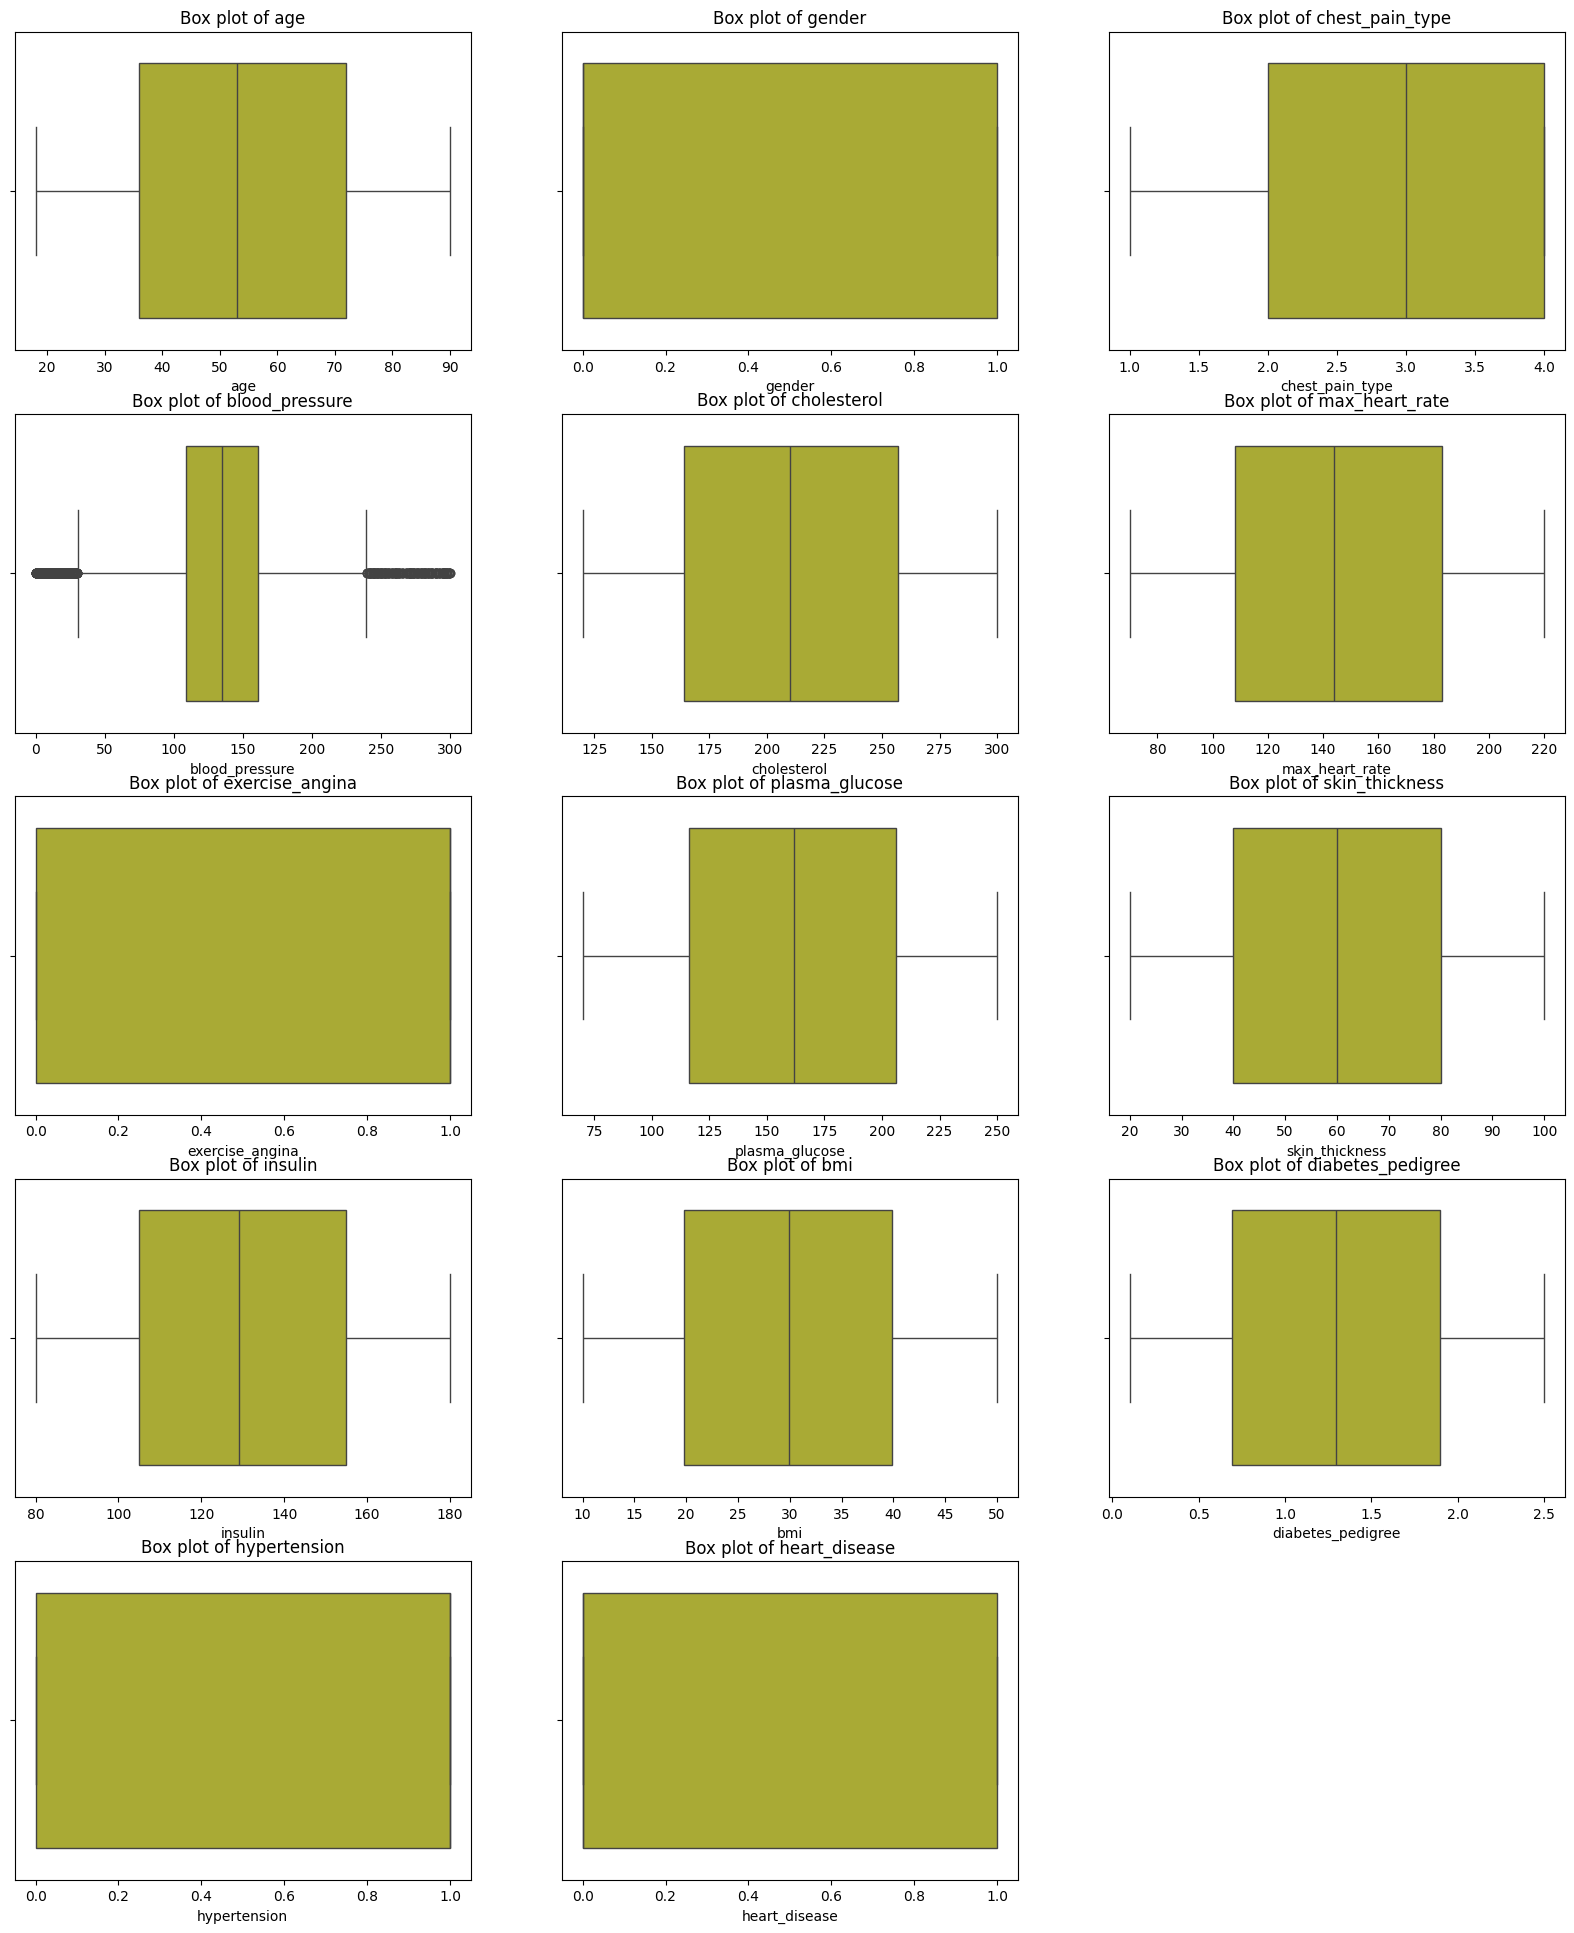

In [13]:
# calling outlier_detect function
outlier_detect(df.select_dtypes([int,float]))

### Correlation between all the attributes

In [14]:
# checking for the correlation of all the attributes
df.select_dtypes([int,float]).corr()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
age,1.000000,0.021321,-0.001252,0.005912,0.002531,0.010331,-0.006693,-0.009699,0.005171,-0.035283,-0.016589,0.030123,-0.007514,-0.012946
gender,0.021321,1.000000,-0.005215,0.016259,0.004858,0.026764,0.010499,0.007851,-0.001284,0.006702,0.002734,0.008759,0.006541,0.002889
chest_pain_type,-0.001252,-0.005215,1.000000,0.015930,-0.015811,0.020686,-0.007815,0.015229,-0.008896,-0.003066,-0.004923,-0.000144,-0.019766,-0.001719
blood_pressure,0.005912,0.016259,0.015930,1.000000,-0.014097,0.026751,-0.002041,0.017787,-0.005519,0.011264,0.001081,-0.023385,0.012825,-0.010335
cholesterol,0.002531,0.004858,-0.015811,-0.014097,1.000000,-0.014911,-0.006372,-0.005756,-0.001577,-0.011774,-0.001063,-0.002393,0.014846,0.004721
max_heart_rate,0.010331,0.026764,0.020686,0.026751,-0.014911,1.000000,-0.001935,-0.007849,-0.028336,0.007280,-0.019281,0.003655,0.012177,0.005928
exercise_angina,-0.006693,0.010499,-0.007815,-0.002041,-0.006372,-0.001935,1.000000,0.001276,-0.022320,0.007602,-0.007434,-0.011022,0.016984,-0.003310
plasma_glucose,-0.009699,0.007851,0.015229,0.017787,-0.005756,-0.007849,0.001276,1.000000,-0.018901,-0.014776,-0.001899,0.001779,0.015177,-0.003496
skin_thickness,0.005171,-0.001284,-0.008896,-0.005519,-0.001577,-0.028336,-0.022320,-0.018901,1.000000,-0.013125,0.011246,-0.013596,-0.002853,-0.002921
insulin,-0.035283,0.006702,-0.003066,0.011264,-0.011774,0.007280,0.007602,-0.014776,-0.013125,1.000000,-0.000096,-0.017266,-0.016942,0.003121


<Axes: >

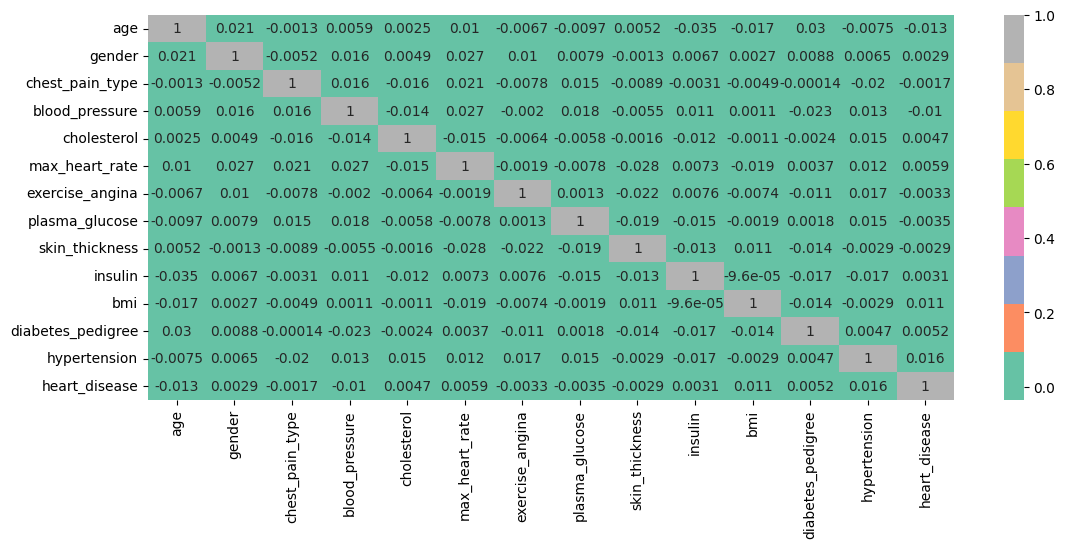

In [12]:
# visualizing the correlation matrix
plt.figure(figsize=(13,5))
sns.heatmap(df.select_dtypes([int,float]).corr(),
           annot = True, cmap = 'Set2')

### Relationship between important variables

<Axes: xlabel='smoking_status', ylabel='count'>

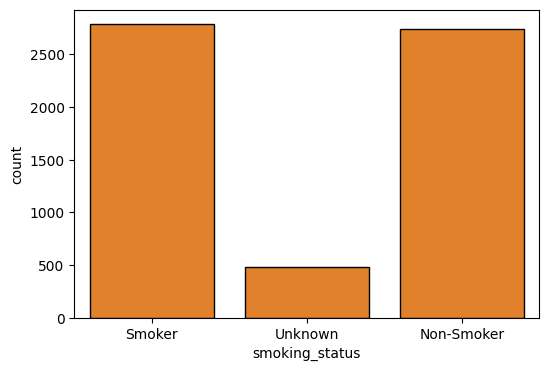

In [16]:
# checking for smoking status
plt.figure(figsize=(6,4))
sns.countplot(x = df['smoking_status'], color='C1', edgecolor='black')

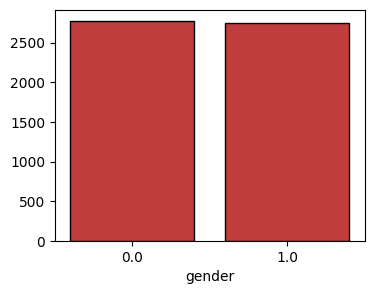

In [13]:
# distribution of the gender column
plt.figure(figsize=(4,3))
sns.barplot(x = df['gender'].value_counts().index, 
            y = df['gender'].value_counts().values, 
            color = 'C3', edgecolor = 'black')
plt.show()

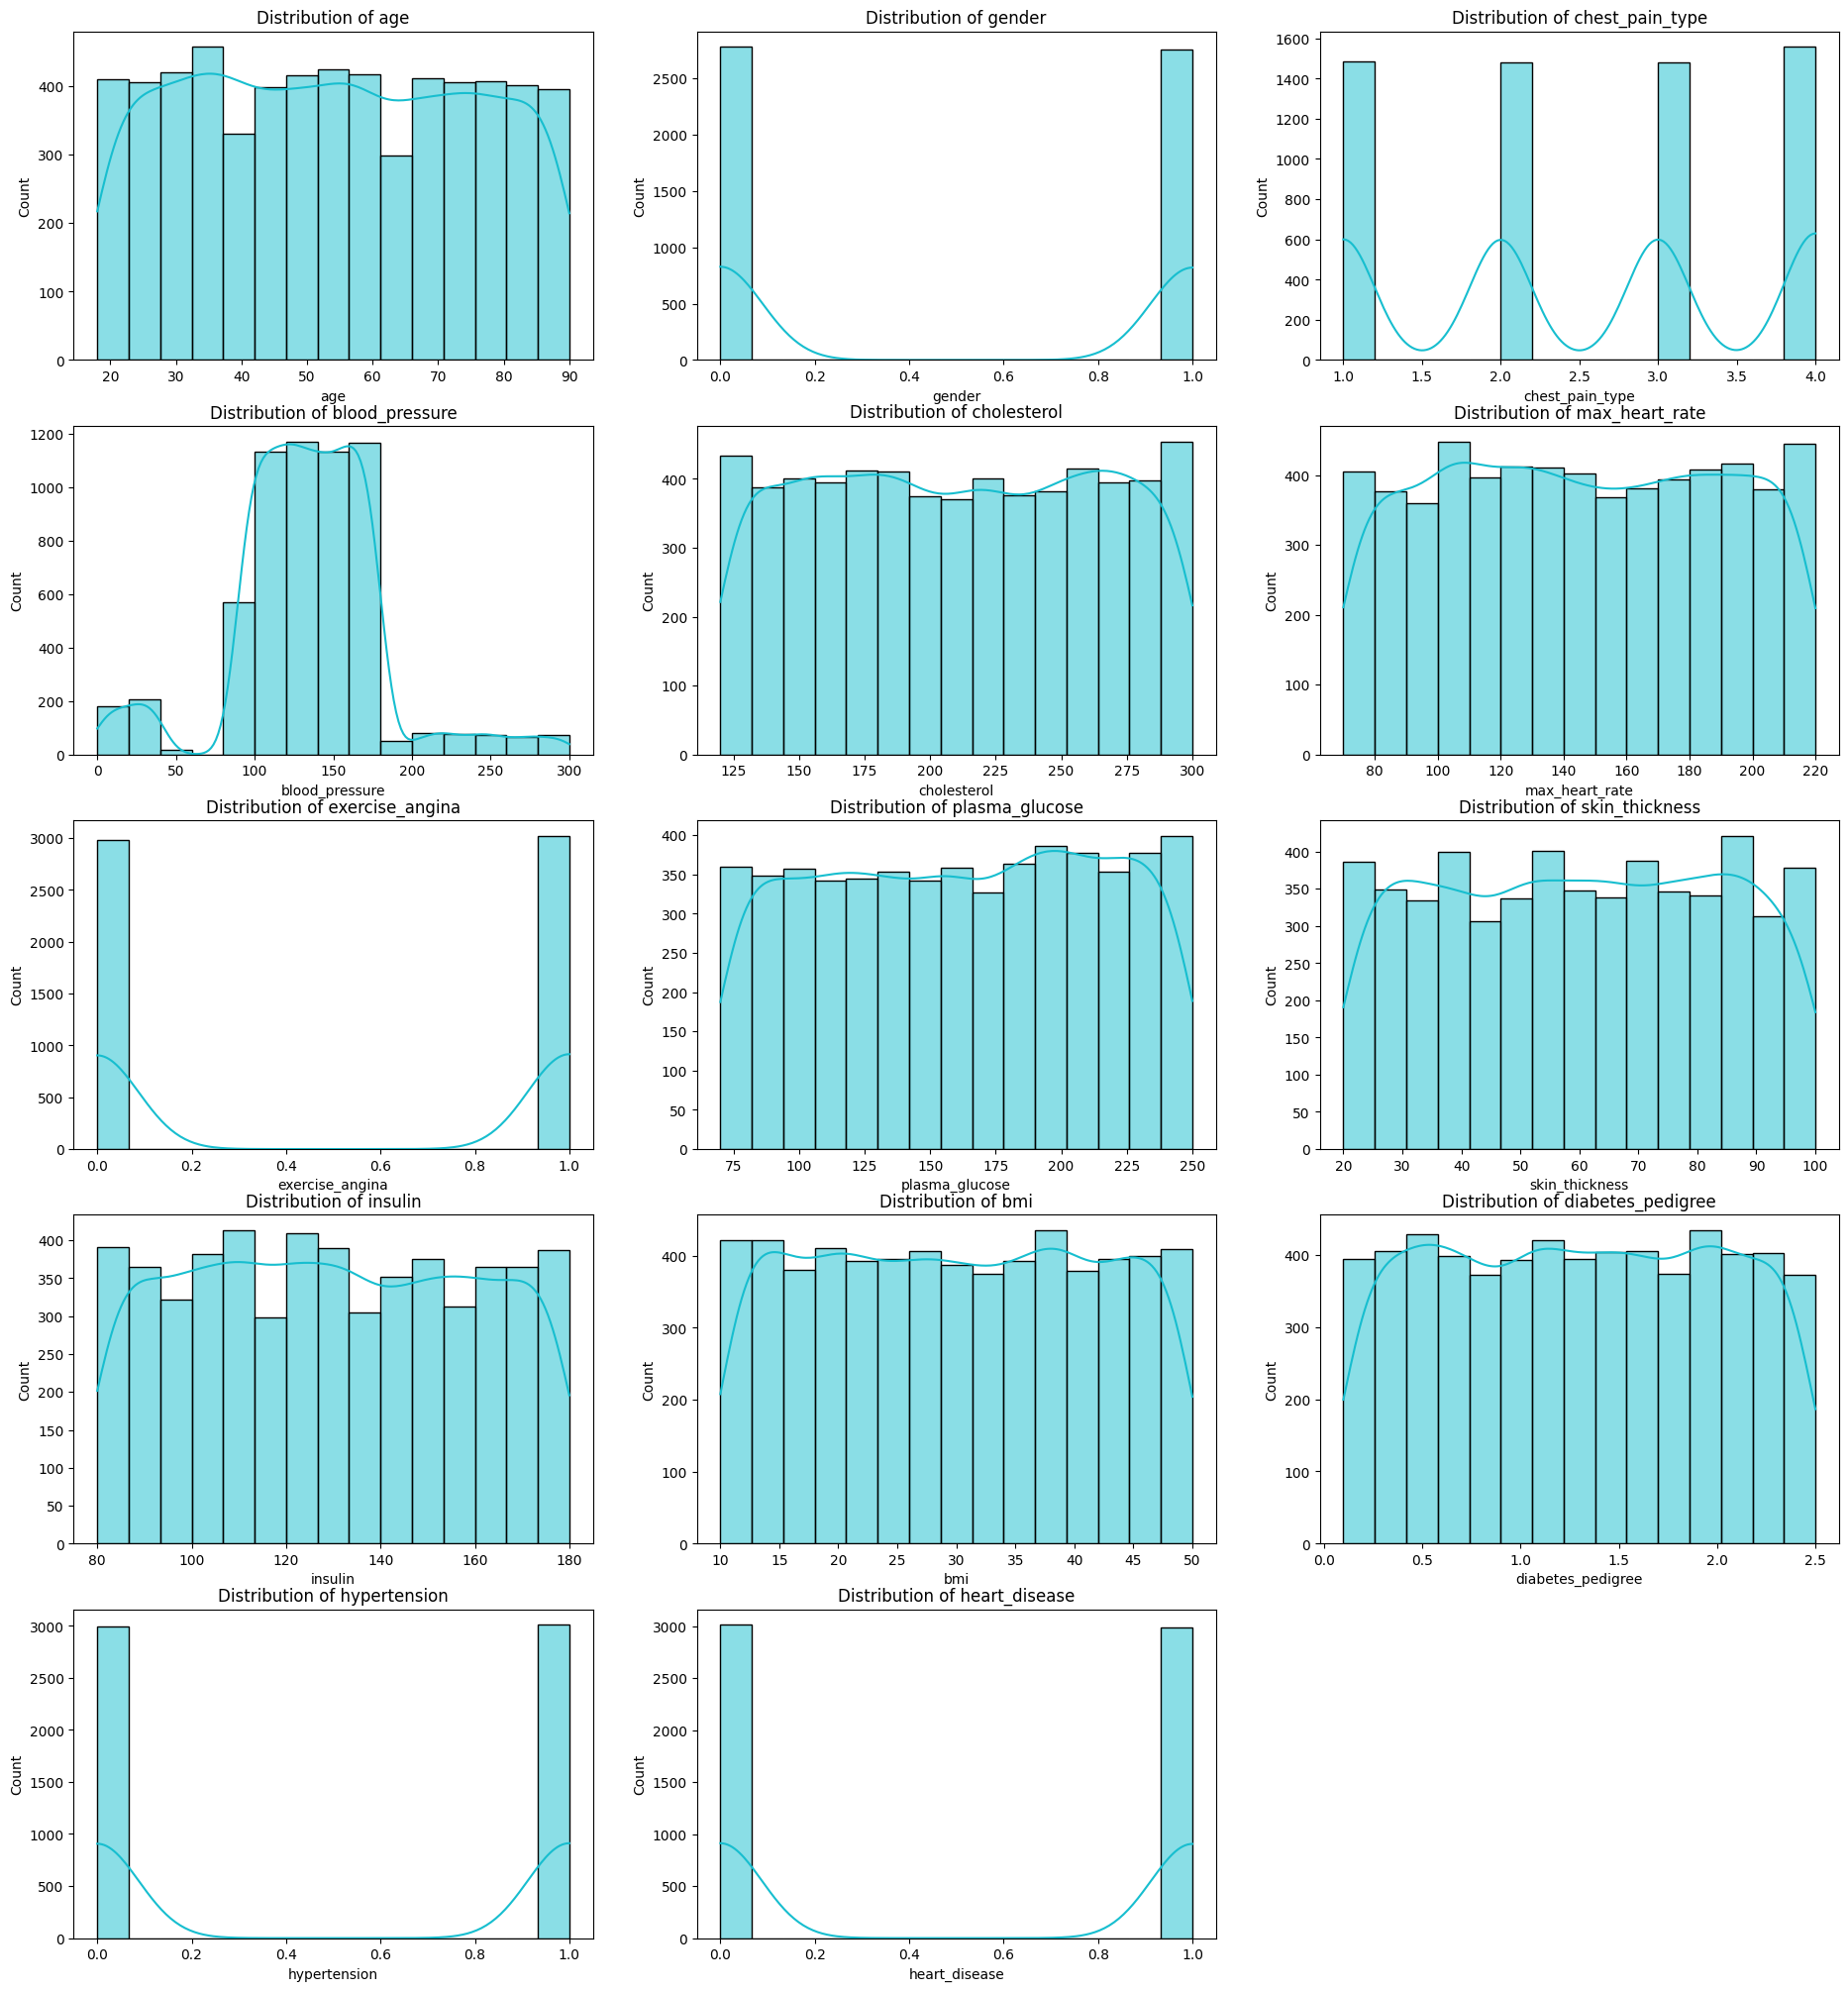

In [18]:
# visualization of numerical distribution
i = 1
plt.figure(figsize=(23,25))
for num_colo in df.select_dtypes([int,float]):
    plt.subplot(5,3,i)
    sns.histplot(x = df[num_colo], kde=True, bins=15, color='C9', alpha=0.5)
    plt.title(f'Distribution of {num_colo}')
    i += 1
plt.show()

### Illustrate the insights based on EDA

---

## 2. Data Preprocessing

### Imputation

In [19]:
# creating null column list
null_col = [column for column in df.columns if df[column].count() < len(df)]
null_col

['gender', 'plasma_glucose', 'skin_thickness', 'insulin', 'residence_type']

In [20]:
# treatment of null columns
for col in df[null_col]:
    if df[col].dtypes in [int,float]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [21]:
# checking for the null columns again
df.isna().sum()

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64

Now, the treatment of missing values has been done

### Outlier Treatment

In [22]:
# function for treatment of outliers 
threshold = 1.5
def treat_outliers(data, numerical_colls):
    for colos in numerical_colls:
    
        # finding q1, q3 and IQR
        q1 = data[colos].quantile(0.25)
        q3 = data[colos].quantile(0.75)
        IQR = q3 - q1
    
        # finding upper wisker and lower wisker
        upper_wisker = q3 + threshold * IQR
        lower_wisker = q1 - threshold * IQR
    
        # capping the outliers
        data[colos] = data[colos].clip(lower=lower_wisker, upper=upper_wisker)

In [23]:
# calling treat_outlier function from treatment
treat_outliers(df, df.select_dtypes([int,float]))

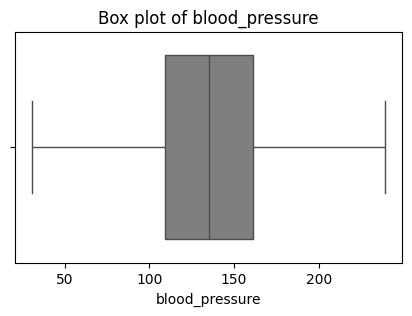

In [24]:
# checking for blood pressure column after outlier treatment
plt.figure(figsize=(5,3))
sns.boxplot(x = df['blood_pressure'], color='C7')
plt.title(f'Box plot of blood_pressure')      
plt.show()

Now, the blood pressure attribute outliers has been treated

### Encoding all the categorical attributes

In [1]:
from sklearn.preprocessing import LabelEncoder

In [26]:
# encoding categorical columns
lb_ecd = LabelEncoder()
for coll in df.select_dtypes(object):
    df[coll] = lb_ecd.fit_transform(df[coll])

In [27]:
# checking for the columns after encoding
df[['residence_type','smoking_status']].head()

,residence_type,smoking_status
0,1,1
1,1,2
2,0,0
3,0,1
4,0,1


### Standardization

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
# scaling the dataset
scaler = MinMaxScaler()
x = scaler.fit_transform(df)

Used MinMaxScaler because StandardScaler was not giving the good Silhouette Score and even the value of WCSS was high.

---

## 3. Model Training

### K-Means with hyperparameter tuning

In [99]:
from sklearn.cluster import KMeans

In [100]:
from sklearn.metrics import silhouette_score

In [101]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(init='random', n_clusters=k, random_state=42)
    clusters = kmeans.fit(x)
    wcss.append(clusters.inertia_)  

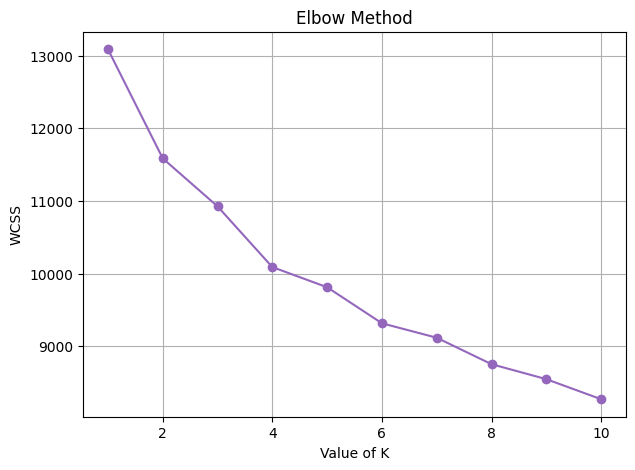

In [102]:
plt.figure(figsize=(7,5))
plt.plot(range(1,11), wcss, marker='o', color='C4')
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [103]:
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(init='random', n_clusters=k, random_state=42)
    result = kmeans.fit(x)
    score = silhouette_score(x, result.labels_)
    silhouette_scores.append(score)

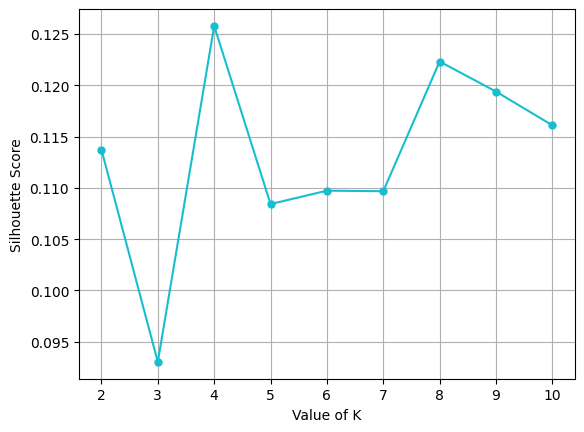

In [104]:
plt.plot(range(2,11), silhouette_scores, marker='o', markersize=5, color='C9')
plt.xlabel('Value of K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Here, we observed that-
- No significant drop in WCSS after the value of k=4
- At k=4 the value of Silhouette Score is high

So, the optimal value of k is 4

In [105]:
kmeans = KMeans(init='random', n_clusters=4, random_state=42)
kmeans.fit(x)

KMeans(init='random', n_clusters=4, random_state=42)

In [106]:
print(f'WCSS : {kmeans.inertia_}')
print(f'Silhouette Score : {silhouette_score(x, kmeans.labels_)}')

WCSS : 10090.25053403333
Silhouette Score : 0.12579259321114175


#### 2D Visualization of clusters using TSNE

In [3]:
from sklearn.manifold import TSNE

In [130]:
tsne = TSNE(2)
com_tsne = tsne.fit_transform(x)

In [134]:
com_tsne[:3]

array([[ 11.740958 ,  37.46395  ],
       [  3.8236716,  74.382    ],
       [-50.6491   ,  -5.267997 ]], dtype=float32)

In [136]:
# converting array into dataframe
data_2_dim = pd.DataFrame(com_tsne, columns=['X1', 'X2'])
data_2_dim['label'] = kmeans.labels_
data_2_dim.head()

,X1,X2,label
0,11.740958,37.463951,0
1,3.823672,74.382004,0
2,-50.649101,-5.267997,1
3,-51.411289,33.798832,2
4,-12.675850,45.819382,0


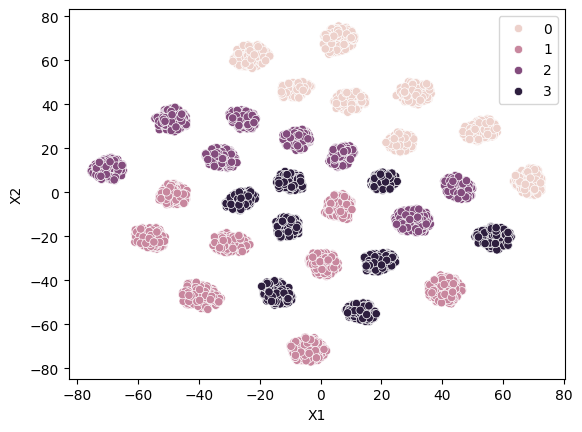

In [155]:
sns.scatterplot(x=data_2_dim['X1'], y=data_2_dim['X2'], hue=kmeans.labels_)
plt.show()

In [159]:
data = pd.DataFrame(x, columns=df.columns, index=df.index)
data.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,0.083333,1.0,1.000000,1.000000,0.105556,0.946667,0.0,0.211111,0.1625,0.29,0.699942,0.158449,1.0,1.0,1.0,0.5
1,0.152778,0.0,1.000000,0.485577,0.372222,0.513333,0.0,0.733333,0.2750,0.49,0.389612,0.076647,1.0,1.0,1.0,1.0
2,0.388889,0.0,0.666667,1.000000,0.361111,0.820000,0.0,0.438889,0.2875,0.22,0.697260,0.988612,1.0,0.0,0.0,0.0
3,0.763889,0.0,0.333333,0.341346,0.444444,0.366667,0.0,0.194444,0.7125,0.85,0.216378,0.571763,0.0,1.0,0.0,0.5
4,0.430556,1.0,0.666667,0.288462,0.238889,0.813333,0.0,0.511111,0.1375,0.90,0.069045,0.182349,1.0,1.0,0.0,0.5


In [160]:
data['label'] = pd.Series(kmeans.labels_, index=data.index)

In [161]:
clustered_df = data.groupby('label').mean()

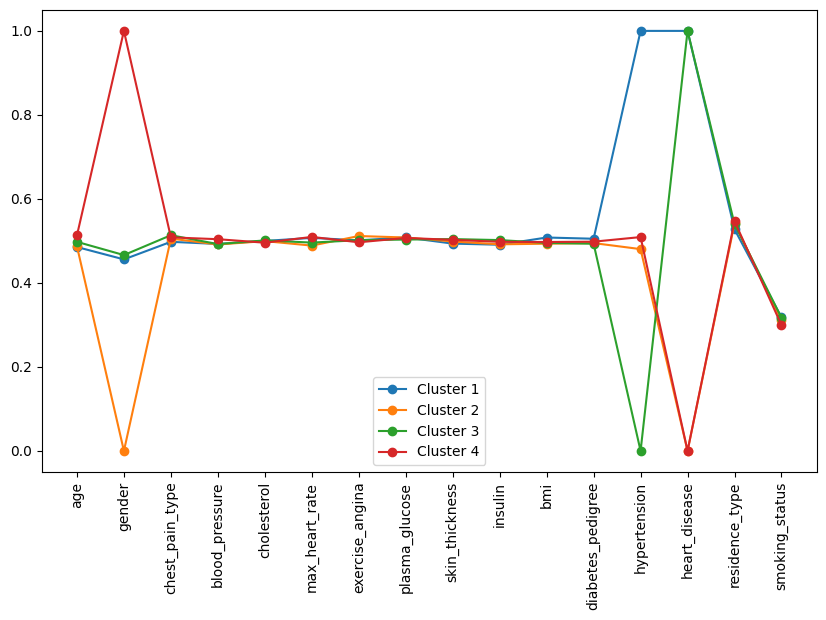

In [163]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.figure(figsize=(10,6))
plt.plot(clustered_df.T, label=labels, marker='o')
plt.xticks(rotation=90)
plt.legend(labels)
plt.show()

### Gaussian Mixture Model with hyperparameter tuning

### Hierarchical Clustering with hyperparameter tuning

In [120]:
from scipy.cluster import hierarchy

In [121]:
z = hierarchy.linkage(x, method='ward')

In [122]:
z.shape

(5999, 4)

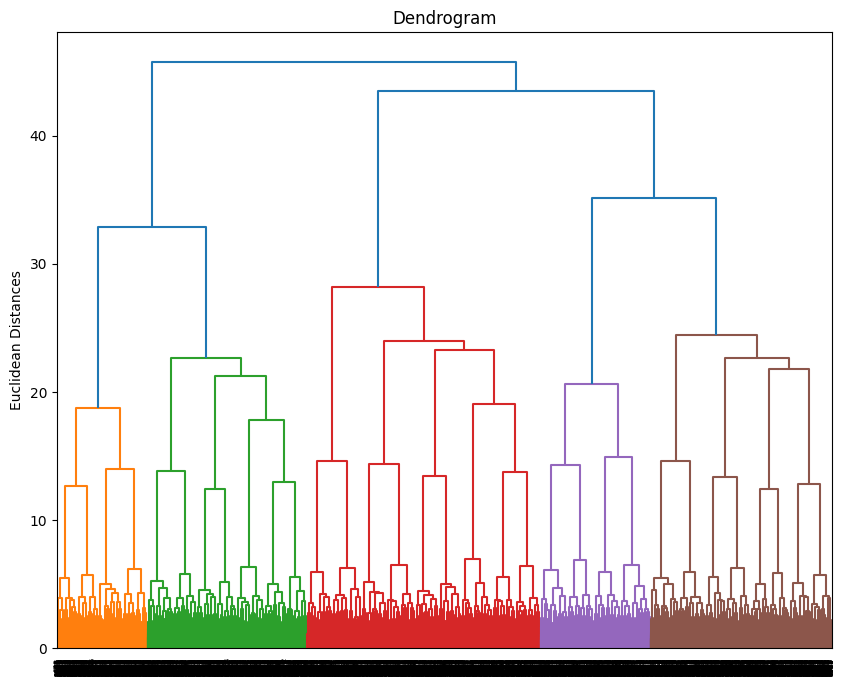

In [127]:
plt.figure(figsize=(10,8))
hierarchy.dendrogram(z)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.show()

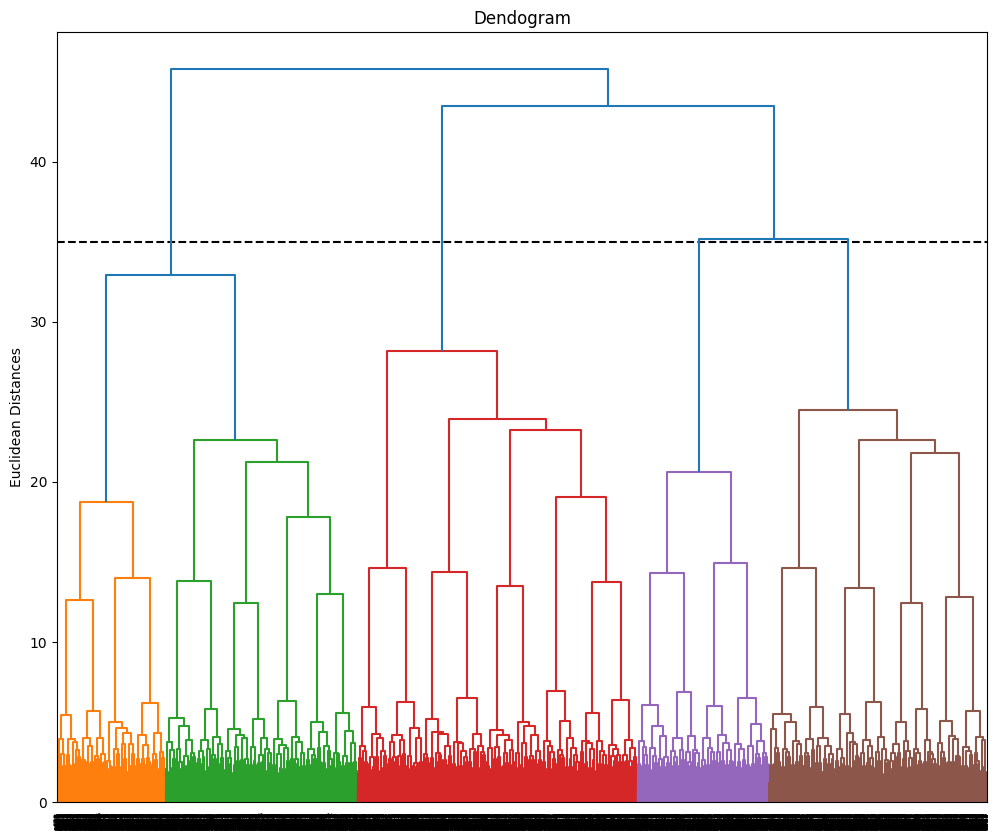

In [128]:
fig, ax = plt.subplots(figsize=(12,10))
plt.axhline(y=35, color='k', linestyle='--')
hierarchy.dendrogram(z)
plt.title('Dendogram')
plt.ylabel('Euclidean Distances')
plt.show()